In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array, matmul
from collections import Counter
import networkx as nx
tweets_number = 100
df = pd.read_csv(r"./hashtag_donaldtrump.csv",lineterminator='\n', nrows=tweets_number)[["tweet", "user_screen_name"]]
df.head()

,tweet,user_screen_name
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elsollatinonews
1,"Usa 2020, Trump contro Facebook e Twitter: cop...",MediasetTgcom24
2,"#Trump: As a student I used to hear for years,...",snarke
3,2 hours since last tweet from #Trump! Maybe he...,trumpytweeter
4,You get a tie! And you get a tie! #Trump ‘s ra...,Ranaabtar


In [2]:
tweetsColumn= df['tweet']
def getTweetTopics(tweet: str) -> set[str]:
    tweetWords = tweet.split()
    tweetTopics = map(lambda hashtag: hashtag[1:], filter(lambda word: word.startswith("#"), tweetWords))
    return set(tweetTopics)

allTopics = Counter([topic for tweet in tweetsColumn for topic in getTweetTopics(tweet)])

allTopics, len(allTopics)

(Counter({'Trump': 57,
          'DonaldTrump': 17,
          'COVID19': 9,
          'TrumpLiesAmericansDie': 9,
          'TrumpPence2020': 9,
          'trump': 8,
          'MAGA': 7,
          'Biden': 6,
          'TrumpIsALaughingStock': 6,
          'TrumpCrimeFamily': 6,
          'JoeBiden': 5,
          'fools': 5,
          'COVIDIOTS': 5,
          'TrumpFakedCovid': 5,
          'TrumpFailed': 5,
          'DumpTrump': 5,
          'donaldtrump': 4,
          'Election2020': 4,
          'KAG': 4,
          'MAGA2020': 4,
          'USA': 4,
          'election': 4,
          'Trump:': 3,
          'censorship': 3,
          'Trump.': 3,
          'TrumpCovid19': 3,
          'TrumpRallyDesMoines': 3,
          'politics': 3,
          'tRump': 3,
          'TheReidOut': 2,
          'SCOTUS': 2,
          'KamalaHarris': 2,
          'China': 2,
          'Trump2020LandslideVictory': 2,
          'America': 2,
          'AmericaFirst': 2,
          'Vote': 2,
          '

In [3]:
authorsColumn = df['user_screen_name']
def getTweetActors(tweet: str, tweetAuthor: str) -> set[str]:
    tweetWords = tweet.split()
    tweetMentions = set(map(lambda hashtag: hashtag[1:], filter(lambda word: word.startswith("@"), tweetWords)))
    tweetMentions.add(tweetAuthor)
    return tweetMentions
allActors = Counter([actor for tweet, author in zip(tweetsColumn, authorsColumn) for actor in getTweetActors(tweet, author)])
allActors, len(allActors)

(Counter({'realDonaldTrump': 14,
          'GOP': 5,
          'MenroeR': 5,
          'snarke': 4,
          'william7424': 4,
          'POTUS': 4,
          'JoeBiden': 3,
          'Twitter': 3,
          'WhiteHouse': 3,
          'SebWrites': 2,
          'RealDonaldTrump': 2,
          'andThisAndThat': 2,
          'MarcInPhoenix': 2,
          'CIAspygirl': 2,
          'PressSec': 2,
          'dino0726': 2,
          'InconvenientTr5': 2,
          'DonaldJTrumpJr': 2,
          'AMERICANWILDMAN': 2,
          'elsollatinonews': 1,
          'MediasetTgcom24': 1,
          'trumpytweeter': 1,
          'Ranaabtar': 1,
          'CLady62': 1,
          'FarrisFlagg': 1,
          'richardmarx': 1,
          'wilsonfire9': 1,
          'nypost': 1,
          'sm_gulledge': 1,
          'DeeviousDenise': 1,
          'jamieo33': 1,
          'JohnnyQuest22': 1,
          'Dose_Dissonance': 1,
          'vijaya': 1,
          'jack': 1,
          'marciadorsey': 1,
          'ch

In [4]:
filteredTopics = list(filter(lambda topic: allTopics[topic]>2, allTopics))
filteredActors = list(filter(lambda actor: allActors[actor]>2, allActors))
print(filteredTopics, len(filteredTopics))
print(filteredActors, len(filteredActors))
filteredActants = array(filteredTopics + filteredActors)
filteredActants, len(filteredActants)

['DonaldTrump', 'JoeBiden', 'donaldtrump', 'Trump:', 'Trump', 'Election2020', 'censorship', 'Trump.', 'KAG', 'MAGA', 'Biden', 'TrumpCovid19', 'TrumpIsALaughingStock', 'MAGA2020', 'USA', 'COVID19', 'TrumpRallyDesMoines', 'TrumpLiesAmericansDie', 'trump', 'TrumpPence2020', 'politics', 'tRump', 'fools', 'COVIDIOTS', 'TrumpCrimeFamily', 'TrumpFakedCovid', 'TrumpFailed', 'DumpTrump', 'election'] 29
['snarke', 'realDonaldTrump', 'GOP', 'JoeBiden', 'william7424', 'Twitter', 'MenroeR', 'POTUS', 'WhiteHouse'] 9


(array(['DonaldTrump', 'JoeBiden', 'donaldtrump', 'Trump:', 'Trump',
        'Election2020', 'censorship', 'Trump.', 'KAG', 'MAGA', 'Biden',
        'TrumpCovid19', 'TrumpIsALaughingStock', 'MAGA2020', 'USA',
        'COVID19', 'TrumpRallyDesMoines', 'TrumpLiesAmericansDie', 'trump',
        'TrumpPence2020', 'politics', 'tRump', 'fools', 'COVIDIOTS',
        'TrumpCrimeFamily', 'TrumpFakedCovid', 'TrumpFailed', 'DumpTrump',
        'election', 'snarke', 'realDonaldTrump', 'GOP', 'JoeBiden',
        'william7424', 'Twitter', 'MenroeR', 'POTUS', 'WhiteHouse'],
       dtype='<U21'),
 38)

In [5]:
def getAdjacency(tweetDataIndex: int, actantIndex: int) -> int:   
    tweet = df.iloc[tweetDataIndex]
    actant = filteredActants[actantIndex]
    tweetTopics = getTweetTopics(tweet["tweet"]) 
    tweetActors = getTweetActors(tweet["tweet"], tweet["user_screen_name"])
    tweetActants = tweetTopics.union(tweetActors)
    return 1 if actant in tweetActants else 0
tweetActantsM = array([[getAdjacency(i,j) for j in range(len(filteredActants))] for i in range(df.shape[0])])
wholeMatrix = matmul(tweetActantsM.transpose(), tweetActantsM)
for i in range(wholeMatrix.shape[0]):
    wholeMatrix[i,i]= 0
wholeMatrix, wholeMatrix.shape 

(array([[0, 2, 0, ..., 0, 1, 0],
        [2, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 2, 2],
        [1, 0, 0, ..., 2, 0, 2],
        [0, 0, 0, ..., 2, 2, 0]]),
 (38, 38))

In [6]:
topicsMatrix = pd.DataFrame(data=wholeMatrix[:len(filteredTopics), :len(filteredTopics)], columns=filteredTopics, index=filteredTopics)
topicsMatrix

,DonaldTrump,JoeBiden,donaldtrump,Trump:,Trump,Election2020,censorship,Trump.,KAG,MAGA,...,TrumpPence2020,politics,tRump,fools,COVIDIOTS,TrumpCrimeFamily,TrumpFakedCovid,TrumpFailed,DumpTrump,election
DonaldTrump,0,2,0,0,0,0,1,0,1,1,...,2,1,0,0,0,0,0,0,0,0
JoeBiden,2,0,1,0,4,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
donaldtrump,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Trump:,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trump,0,4,0,0,0,4,1,0,3,5,...,7,2,0,5,5,5,5,5,5,3
Election2020,0,0,0,0,4,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
censorship,1,1,0,0,1,1,0,1,1,1,...,1,1,0,0,0,0,0,0,0,1
Trump.,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KAG,1,0,0,0,3,0,1,0,0,4,...,1,0,0,0,0,0,0,0,0,2
MAGA,1,0,1,0,5,0,1,0,4,0,...,1,0,0,0,0,0,0,0,0,2


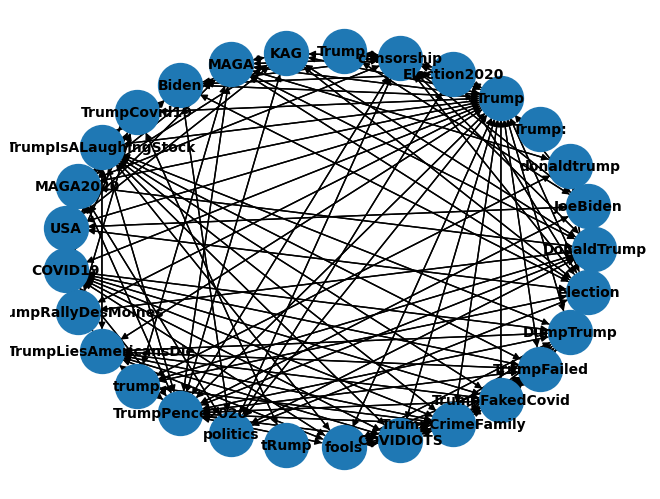

In [7]:
G= nx.from_pandas_adjacency(topicsMatrix, create_using=nx.DiGraph)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_size=10, font_weight='bold', node_size=1000)
nx.write_graphml(G, "test.graphml")
plt.show()


In [39]:
from webweb import Web
web = Web(wholeMatrix[:len(filteredTopics), :len(filteredTopics)], nodes={index:{"name": topic} for index, topic in enumerate(filteredTopics)}, title="PROMUEVA")
web.display.scaleLinkWidth = True
web.display.showNodeNames = True
web.display.charge = 160
web.display.linkLength = 100
web.display.scaleLinkWidth = True
web.display.gravity = .1
web.display.showLegend = False
web.display.radius= 7
web.display.colorBy = 'degree'
web.display.sizeBy = 'degree'
web.display.scaleLinkOpacity = True
web.display.hideMenu = True

web.show()